This notebook contains implementations of statistics methods from first principles

Done:
Mean, variance, standard deviation, z-scores, correlation, linear regression. 

In [51]:
# Load some data from a test I took

country = ['Russia', 'Turkey', 'Hungary', 'Poland', 'Slovak Republic', 'Estonia', 'Greece', 'Portugal', 'Slovenia', 'Spain', 'Korea', 'Italy', 'Japan', 'Israel', 'New Zealand', 'France', 'Belgium', 'Germany', 'Finland', 'Canada', 'Netherlands', 'Austria', 'United Kingdom', 'Sweden', 'Iceland', 'Australia', 'Ireland', 'Denmark', 'United States', 'Brazil', 'Mexico', 'Chile', 'Norway', 'Switzerland']
gdp_per_capita = [9054.91, 9437.37, 12239.89, 12495.33, 15991.74, 17288.08, 18064.29, 19121.59, 20732.48, 25864.72, 27195.2, 29866.58, 32485.55, 35343.34, 37044.89, 37675.01, 40106.63, 40996.51, 41973.99, 43331.96, 43603.12, 43724.03, 43770.69, 49866.27, 50854.58, 50961.87, 51350.74, 52114.17, 55805.2, 8670.0, 10009.28, 13340.91, 74822.11, 80675.31]
happiness_index = [6.0, 5.6, 5.2, 5.8, 6.1, 5.6, 5.8, 5.4, 5.7, 6.5, 5.8, 6.0, 5.9, 7.4, 7.3, 6.5, 6.9, 7.0, 7.4, 7.3, 7.3, 6.9, 6.8, 7.2, 7.5, 7.3, 7.0, 7.5, 7.2, 6.0, 6.2, 6.3, 7.5, 7.7]
generosity = [-0.03800833598, 0.01134008635, -0.03188855574, 0.4699645638, 0.08676241338, 0.043273504819999996, 0.08824136853, -0.09545145184, 0.10158070179999999, 0.04471550137, -0.17993772030000002, 0.09600263089, 0.005692420062, 0.03664433956, -0.007062926422999999, -0.2229295373, 0.13624751570000002, 0.07180630416, -0.01933417283, -0.03838358073999999, 0.4209863842, 0.05710758641, -0.2590840161, 0.1417565197, 0.06506087631, -0.10859531160000001, -0.1550479978, -0.09851144999, -0.2627381086, 0.11675003169999999, -0.02549606189, 0.2219981402, 0.1377954036, 0.09796612710000001]
confidence_in_national_government = [0.3237580955, 0.2774777114, 0.35244044659999996, 0.3239920437, 0.2392746359, 0.3276586235, 0.9693563581, 0.1681866497, 0.22635130579999999, 0.40208518509999996, 0.4202025831, 0.6053644418999999, 0.6150319576, 0.2748695016, 0.4761449993, 0.5206306577, 0.3995882273, 0.3989136815, 0.1971623003, 0.2540971637, 0.619251132, 0.8020071387000001, 0.38908401130000003, 0.6392197609, 0.34346687789999997, 0.3848803937, 0.2613522708, 0.23763185739999998, 0.20240309829999997, 0.6424612403, 0.7552008629000001, 0.42085987329999996, 0.46883687380000005, 0.6104668975]

In [2]:
def MEANSTAT(x):
    return float(sum(x))/len(x)

MEANSTAT(gdp_per_capita)


33996.42176470589

In [18]:
def VARSTAT(x):
    
    # errors
    x = [i - MEANSTAT(x) for i in x]
    
    # squares
    x = [i**2 for i in x]

    # sum of squares
    SS = sum(x)
    
    # variance
    var = SS/len(x)
    
    return var
    

VARSTAT(gdp_per_capita)


338506254.2590322

In [19]:
def SDSTAT(x):
    
    import math
    
    return math.sqrt(VARSTAT(x))

SDSTAT(gdp_per_capita)

18398.53945994171

In [53]:
def ZSTAT(x):
    
    x = [(i - MEANSTAT(x))/SDSTAT(x) for i in x]
    
    return x
    
ZSTAT(gdp_per_capita)

[-1.3556245493839276,
 -1.3348370297640841,
 -1.1825140692322553,
 -1.1686303584868367,
 -0.9785929912483898,
 -0.9081341375539178,
 -0.8659454626490426,
 -0.808478944597324,
 -0.7209236251380094,
 -0.4419753960585115,
 -0.36966096029056417,
 -0.22446573945163434,
 -0.08211911429140571,
 0.07320788904068658,
 0.16569077354924822,
 0.1999391442621482,
 0.33210289591723197,
 0.38046977862210646,
 0.4335979088265837,
 0.507406484934304,
 0.5221446113269117,
 0.5287163286234531,
 0.5312523994948173,
 0.8625602195134453,
 0.9162769833985247,
 0.9221084245427307,
 0.943244341382579,
 0.9847383959330601,
 1.1853537767374065,
 -1.3765452317477667,
 -1.303752497144243,
 -1.1226712756019674,
 2.218963539153855,
 2.537097487380773]

In [77]:
def CORRSTAT(x,y):
    
    #if len(x) == len(y):

    x = ZSTAT(x)
        
    y = ZSTAT(y)
        
    product = [a * b for a,b in zip(x,y)]
        
    return (float(1)/(len(x) - 1)) * sum(product) 
              
CORRSTAT(gdp_per_capita,happiness_index)

0.8727488193236118

In [98]:
def REGSTAT(x,y):
    r = CORRSTAT(x,y)
    b = r * ((SDSTAT(y)/SDSTAT(x)))
    intercept = MEANSTAT(y) - MEANSTAT(x) * b 
    return b,intercept

REGSTAT(gdp_per_capita,happiness_index)

(3.4840153326478235e-05, 5.39203004140132)

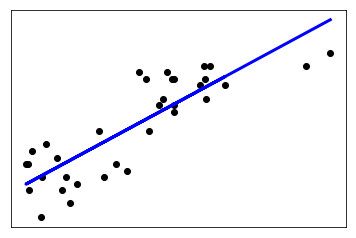

In [104]:
def plot_REGLINE(x,y):
    
    b, intercept = REGSTAT(x,y)

    ypred = [i * b + intercept for i in x]

    import matplotlib.pyplot as plt  
    
    plt.scatter(x, y,  color='black')
    plt.plot(x, ypred, color='blue', linewidth=3)

    plt.xticks(())
    plt.yticks(())

    plt.show()
    
plot_REGSTAT(gdp_per_capita,happiness_index)

I am testing the functions below by comparing them to commonly used implementations

In [76]:
import numpy

#numpy.mean(gdp_per_capita)

#numpy.var(gdp_per_capita)

#numpy.std(gdp_per_capita)

numpy.corrcoef(gdp_per_capita,happiness_index)

array([[1.        , 0.84707974],
       [0.84707974, 1.        ]])

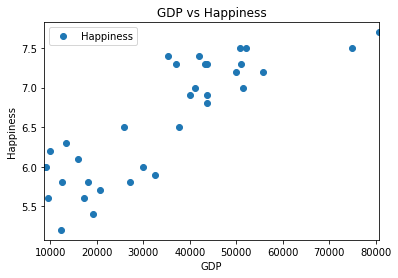

In [87]:
import numpy as np

import pandas as pd

from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt  


# create a dataframe
df = pd.DataFrame(list(zip(country,gdp_per_capita, generosity,confidence_in_national_government,happiness_index)), 
               columns =['Country', 'GDP','Generosity','Confidence','Happiness']) 
df

# plot GDP against Happiness

df.plot(x='GDP', y='Happiness', style='o')  
plt.title('GDP vs Happiness')  
plt.xlabel('GDP')  
plt.ylabel('Happiness')  
plt.show()


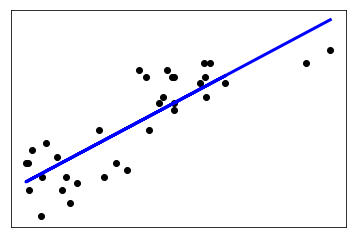

In [96]:
X = df[['GDP']].values
y = df['Happiness'].values

# Create linear regression object.
regression = LinearRegression()

# Fit linear regression.
regression.fit(X,y)

regression.coef_

#regression.intercept_

happiness_predict = regression.predict(X)

plt.scatter(X, y,  color='black')
plt.plot(X, happiness_predict, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()
